<a href="https://colab.research.google.com/github/OptimoCX/BootCampIA/blob/main/PriceVehicleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nombre del laboratorio:
Walter Adres Hernandez Suarez

#Predicción del precio de automóviles con Redes Neuronales
Objetivo general del laboratorio:
Diseñar, entrenar y evaluar una red neuronal para predecir el precio de un automóvil a
partir de sus características técnicas y estructurales. Este laboratorio permitirá aplicar
redes neuronales al ámbito de la regresión supervisada, fortaleciendo su comprensión
del preprocesamiento de datos mixtos (numéricos y categóricos), diseño de modelos, y
análisis del error.

In [31]:
import pandas as pd
import numpy as np

In [32]:
#entrada características como tamaño del motor, número de cilindros, peso, tipo de
#combustible y consumo, prediga con precisión el precio final del vehículo.

df = pd.read_csv('/content/sample_data/CarPrice.csv')

#Clean column names
df.columns = df.columns.str.replace(' ', '_').str.lower()

#Clean numbers Nan
num_cols = ['car_id', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
            'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
            'peakrpm', 'citympg', 'highwaympg', 'price']
for col in num_cols:
  df[col]: pd.to_numeric(df[col], errors='coerce') #Empty values 0 : print("Valores faltantes tras limpieza:\n", df.isnull().sum(), "\n")



In [33]:
#Identificar las variables numéricas y categóricas.
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cate_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric variables:", num_cols)
print("Categorical variables:", cate_cols)

Numeric variables: ['car_id', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
Categorical variables: ['carname', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


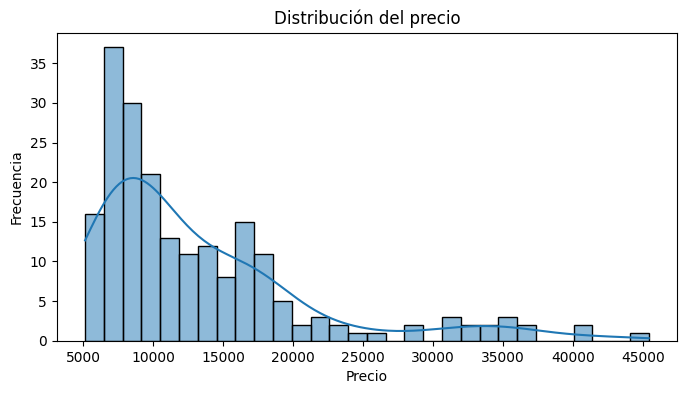

In [34]:
#Visualizar la distribución del precio y posibles relaciones con otras variables.
import matplotlib.pyplot as plt
import seaborn as sns

#How behave the price
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribución del precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

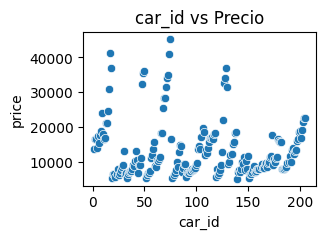

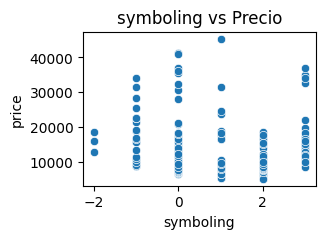

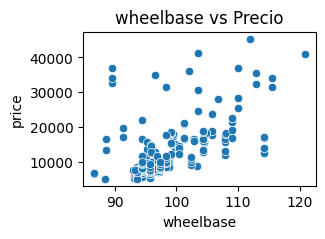

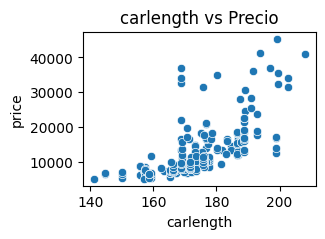

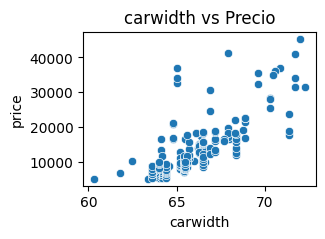

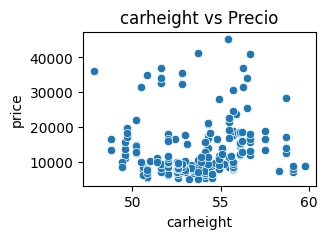

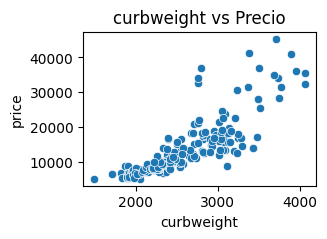

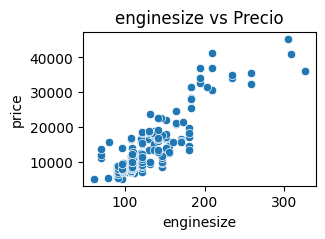

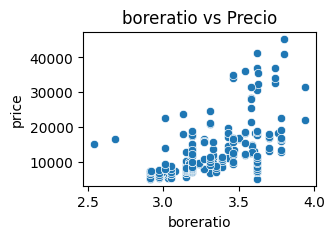

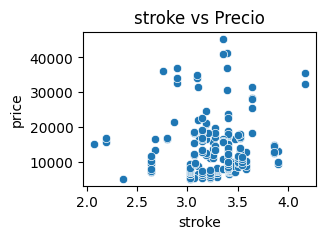

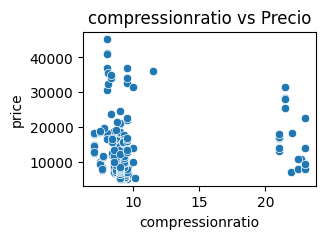

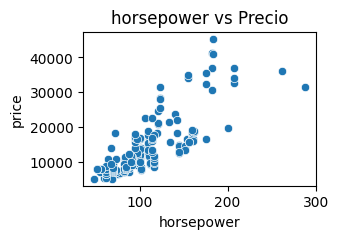

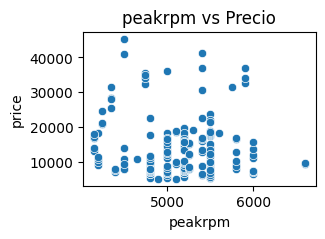

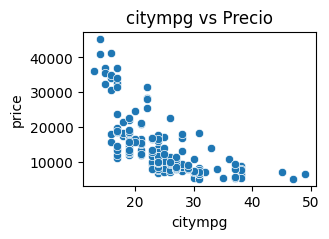

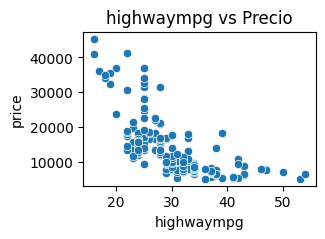

In [35]:
#How behave price agains each numeric column,
num_cols = df.select_dtypes(include=['number']).columns.drop('price', 'car_id')

for col in num_cols:
    plt.figure(figsize=(3, 2))
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f'{col} vs Precio')
    plt.show()

In [36]:
#Categorize between strong predictors or low predictor acoding two indicators visual pattern and correlation coefficient.
correlations = df[num_cols].corrwith(df['price']).sort_values(ascending=False)

# Classify strength
def classify_strength(corr):
    if abs(corr) >= 0.7:
        return 'Strong'
    elif abs(corr) >= 0.3:
        return 'Mild'
    else:
        return 'Low'

correlation_summary = pd.DataFrame({
    'Correlation': correlations,
    'Strength': correlations.apply(classify_strength)
})

In [37]:
#Show table and define which remove
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import ace_tools as tools; import pandas as pd # Removed ace_tools
import seaborn as sns
# tools.display_dataframe_to_user(name="Correlation Summary", dataframe=correlation_summary) # Removed ace_tools function
display(correlation_summary) # Use display() instead

,Correlation,Strength
enginesize,0.874145,Strong
curbweight,0.835305,Strong
horsepower,0.808139,Strong
carwidth,0.759325,Strong
carlength,0.682920,Mild
wheelbase,0.577816,Mild
boreratio,0.553173,Mild
carheight,0.119336,Low
stroke,0.079443,Low
compressionratio,0.067984,Low


In [47]:
#Eliminar columnas irrelevantes o redundantes.
#Clear df from varibles that do not help
df_c = df.drop(columns=['car_id', 'peakrpm', 'symboling', 'compressionratio', 'stroke', 'carheight'])

In [52]:
#Convertir variables categóricas en variables numéricas mediante codificación adecuada.
#Before continiu i need to change my object varibles by dummies
# Identify object-type (categorical) columns
cat_cols = df_c.select_dtypes(include='object').columns

# Create dummy variables (drop_first=True to avoid dummy variable trap)
df_c = pd.get_dummies(df_c, columns=cat_cols, drop_first=True)

In [53]:
df_c.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,False,False,False,False,False,False,False,True,False,False
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,False,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,False,False,False,False,False,False,False,True,False,False


In [40]:
#Show the data frame an positions to be selected
for idx, col in enumerate(df_c.columns):
    print(f"{idx}: {col}")

0: carname
1: fueltype
2: aspiration
3: doornumber
4: carbody
5: drivewheel
6: enginelocation
7: wheelbase
8: carlength
9: carwidth
10: curbweight
11: enginetype
12: cylindernumber
13: enginesize
14: fuelsystem
15: boreratio
16: horsepower
17: citympg
18: highwaympg
19: price


In [60]:
#Separate varible according y and x (features)
y = df_c.iloc[:, 19]
X = df_c.drop(df_c.columns[19], axis=1)

print("Features (x) shape:", x.shape)
print("Target (y) shape:", y.shape)

Features (x) shape: (205, 19)
Target (y) shape: (205,)


In [62]:
# Dividir el dataset en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#Normalizar o estandarizar las variables numéricas para facilitar el entrenamiento según FeaturesX. Según entiendo hacr esto antes de separar y de x puede generar perdida de información.
##StandardScaler - Care about the mean and std desviation from the sample
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scalerSS = StandardScaler()
X_trainSS = scalerSS.fit_transform(X_train)
X_testSS = scalerSS.transform(X_test)

In [66]:
##MinMaxScaler  - Min an max value from the sample
from sklearn.preprocessing import MinMaxScaler

scalerMM = MinMaxScaler()
X_trainMM = scalerMM.fit_transform(X_train)
X_testMM = scalerMM.transform(X_test)

#Construcción del Modelo (Arquitectura)
Recordatorio Dropout:

Durante el entrenamiento, el dropout desactiva aleatoriamente (pone a cero) una fracción de las neuronas en una capa en cada iteración. Esto significa que algunas neuronas no participan en la propagación hacia adelante (forward pass) ni en la retropropagación (backward pass) en un paso dado.

Si configuramos un dropout del 20% (Dropout(0.2)), en cada paso de entrenamiento, el 20% de las neuronas de esa capa se "apagarán" aleatoriamente.

Ventajas:

Reduce el sobreajuste: Evita que la red dependa demasiado de neuronas específicas, fomentando que todas aprendan características útiles.

Mejora la generalización: La red se vuelve más robusta y funciona mejor con datos no vistos (test set).

Simula un ensamble de redes: Al apagar neuronas aleatoriamente, cada paso de entrenamiento trabaja con una "sub-red" diferente, lo que se asemeja a entrenar múltiples redes y promediar sus resultados.

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


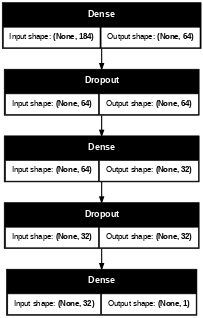

In [70]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_trainSS.shape[1],)),  # 1ª Capa oculta (64 neuronas)
    layers.Dropout(0.3),                                                  # Capa de Dropout (regularización)
    layers.Dense(32, activation='relu'),                                  # 2ª Capa oculta (32 neuronas)
    layers.Dropout(0.3),                                                  # Capa de Dropout (regularización)
    layers.Dense(1, activation='sigmoid')                                 # Capa de salida (1 neurona)
])

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, dpi=40)

#Compilación Modelo

In [71]:
# Compilar el modelo
model.compile(
    optimizer='adam',  # Usamos Adam, una variante avanzada de gradiente descendente
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │        11,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,953 (54.50 KB)

 Trainable params: 13,953 (54.50 KB)

 Non-trainable params: 0 (0.00 B)

#Entrenamiento Modelo

In [80]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.9697 - val_loss: 0.0402
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9697 - val_loss: 0.0436
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9697 - val_loss: 0.0456
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9697 - val_loss: 0.0459
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9697 - val_loss: 0.0434
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 9.7114e-04 - val_accuracy: 0.9697 - val_loss: 0.0408
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9697 - val_loss: 0.0368
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9697 - val_loss: 0.0

In [76]:
history = model.fit(
    X_trainSS, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 5.0897e-04 - val_accuracy: 0.8788 - val_loss: 0.2553
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 2.5653e-05 - val_accuracy: 0.8788 - val_loss: 0.2553
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 1.8881e-04 - val_accuracy: 0.8788 - val_loss: 0.2551
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 3.2754e-04 - val_accuracy: 0.8788 - val_loss: 0.2540
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9944 - loss: 0.0055 - val_accuracy: 0.8485 - val_loss: 0.2517
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 3.1101e-04 - val_accuracy: 0.8485 - val_loss: 0.2518
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 6.1912e-05 - val_accuracy: 0.8485 - val_loss: 0.2522
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 1.7449e-04 - val_accuracy

In [77]:
history = model.fit(
    X_trainMM, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.9697 - val_loss: 0.0567
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9697 - val_loss: 0.0352
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0258
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0231
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0229
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0256
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0285
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0324


In [81]:
# Evaluación
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nMétricas de evaluación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nExactitud (accuracy):", accuracy_score(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Métricas de evaluación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.00      0.00      0.00         0

    accuracy                           0.98        41
   macro avg       0.50      0.49      0.49        41
weighted avg       1.00      0.98      0.99        41


Matriz de confusión:
[[40  1]
 [ 0  0]]

Exactitud (accuracy): 0.975609756097561


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


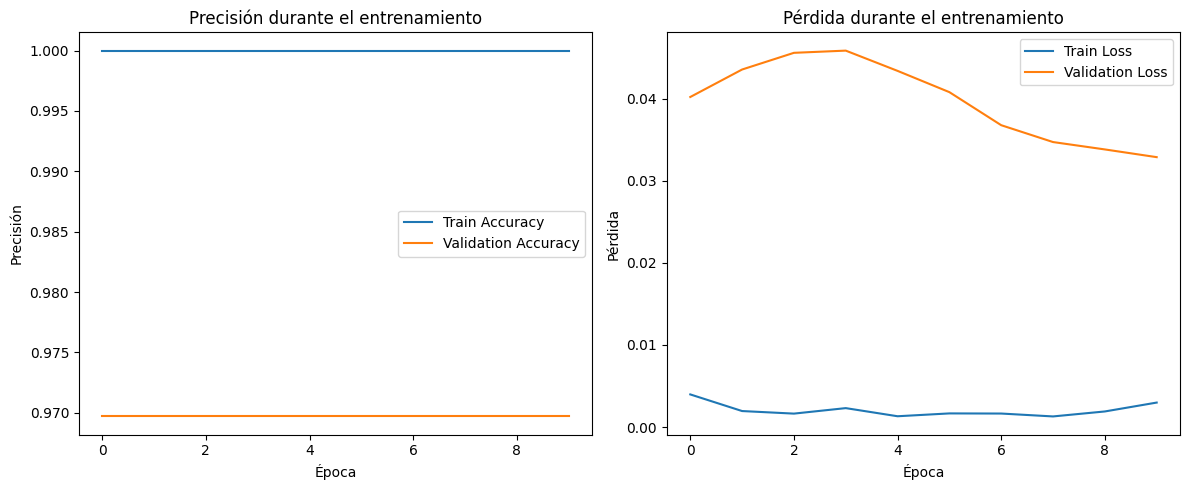

In [82]:
# Visualización del entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

❌ Bad:
The validation accuracy drops while training stays at 1.0 → clear sign of overfitting.

#2 Option
##Reduce the number of Layers


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


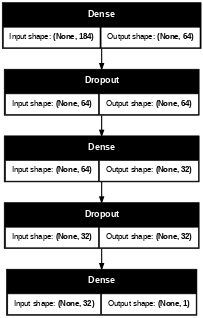

In [83]:
model2 = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(X_trainSS.shape[1],)),  # 1ª Capa oculta (8 neuronas)
    layers.Dropout(0.2),                                                  # Capa de Dropout (regularización)
    layers.Dense(4, activation='relu'),                                  # 2ª Capa oculta (4 neuronas)
    layers.Dropout(0.2),                                                  # Capa de Dropout (regularización)
    layers.Dense(1, activation='sigmoid')                                 # Capa de salida (1 neurona)
])

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, dpi=40)

In [86]:
# Compilar el modelo
model2.compile(
    optimizer='Adam',  # Usamos Adam, una variante avanzada de gradiente descendente
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Resumen del modelo
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 8)              │         1,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,521 (5.94 KB)

 Trainable params: 1,521 (5.94 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
history = model2.fit(
    X_trainSS, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6622 - loss: 0.6003 - val_accuracy: 0.7273 - val_loss: 0.5817
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7894 - loss: 0.5767 - val_accuracy: 0.7879 - val_loss: 0.5730
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8049 - loss: 0.5383 - val_accuracy: 0.8182 - val_loss: 0.5646
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8242 - loss: 0.5090 - val_accuracy: 0.8485 - val_loss: 0.5578
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8735 - loss: 0.4933 - val_accuracy: 0.8485 - val_loss: 0.5512
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8903 - loss: 0.4608 - val_accuracy: 0.8485 - val_loss: 0.5451
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9103 - loss: 0.4139 - val_accuracy: 0.8485 - val_loss: 0.5394
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9118 - loss: 0.4717 - val_accuracy: 0.8485 - val_loss: 0.5340


In [88]:
# Evaluación
y_pred = (model2.predict(X_test) > 0.5).astype("int32")

print("\nMétricas de evaluación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nExactitud (accuracy):", accuracy_score(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

Métricas de evaluación:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        41

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41


Matriz de confusión:
[[41]]

Exactitud (accuracy): 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


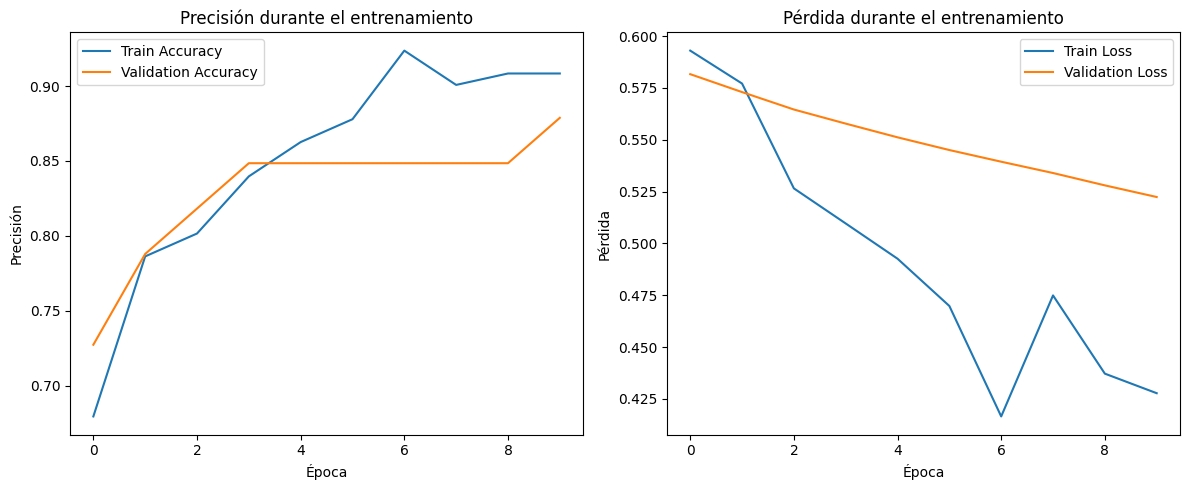

In [89]:
# Visualización del entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

Both losses decrease = model is learning.
No overfitting (validation loss is not increasing).
The trend is smooth and stable.